In [15]:
import torch

X_train = torch.tensor(
    [258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0]
).view(-1, 1)

y_train = torch.tensor(
    [236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8]
)

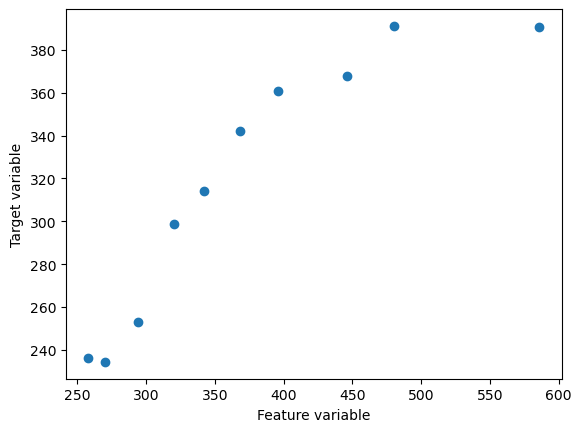

In [16]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)
plt.xlabel("Feature variable")
plt.ylabel("Target variable")
plt.show()

In [17]:
class PytorchMLP(torch.nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.hidden_1 = torch.nn.Linear(n_features, 50)
        self.hidden_2 = torch.nn.Linear(50, 25)
        self.output = torch.nn.Linear(25, 1)
        
    def forward(self, x):
        x = torch.relu(self.hidden_1(x))
        x = torch.relu(self.hidden_2(x))
        x = self.output(x)
        return x

In [18]:
x_mean, x_std = X_train.mean(), X_train.std()
y_mean, y_std = y_train.mean(), y_train.std()

X_train_norm = (X_train - x_mean) / x_std
y_train_norm = (y_train - y_mean) / y_std

In [19]:
from torch.utils.data import DataLoader, Dataset

class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
    
train_ds = CustomDataset(X_train_norm, y_train_norm)
train_loader = DataLoader(train_ds, batch_size=20, shuffle=True)

In [20]:
import torch
from torch.optim import SGD
import torch.nn.functional as F
torch.manual_seed(1)
model = PytorchMLP(1)
model.to('cuda')
optimizer = SGD(model.parameters(), lr=0.01)    
epochs=100

loss_list = []
for epoch in range(epochs):
    model = model.train()
    
    for batch_idx, (X_batch, y_batch) in enumerate(train_loader):
        X_batch, y_batch = X_batch.to('cuda'), y_batch.to('cuda')
        output = model(X_batch)
        loss = F.mse_loss(output, y_batch.unsqueeze(1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f'Epoch {epoch+1}/{epochs}, Step {batch_idx+1}, Loss: {loss.item()}')
        loss_list.append(loss.item())
        

    


Epoch 1/100, Step 1, Loss: 0.8613705039024353
Epoch 2/100, Step 1, Loss: 0.8364896774291992
Epoch 3/100, Step 1, Loss: 0.8123441934585571
Epoch 4/100, Step 1, Loss: 0.7886378765106201
Epoch 5/100, Step 1, Loss: 0.7646351456642151
Epoch 6/100, Step 1, Loss: 0.7417046427726746
Epoch 7/100, Step 1, Loss: 0.7190098762512207
Epoch 8/100, Step 1, Loss: 0.6967090964317322
Epoch 9/100, Step 1, Loss: 0.6747488379478455
Epoch 10/100, Step 1, Loss: 0.6532007455825806
Epoch 11/100, Step 1, Loss: 0.6320563554763794
Epoch 12/100, Step 1, Loss: 0.611035168170929
Epoch 13/100, Step 1, Loss: 0.5898779630661011
Epoch 14/100, Step 1, Loss: 0.5690080523490906
Epoch 15/100, Step 1, Loss: 0.5484470725059509
Epoch 16/100, Step 1, Loss: 0.5283152461051941
Epoch 17/100, Step 1, Loss: 0.5084664225578308
Epoch 18/100, Step 1, Loss: 0.48884353041648865
Epoch 19/100, Step 1, Loss: 0.4698033928871155
Epoch 20/100, Step 1, Loss: 0.45111581683158875
Epoch 21/100, Step 1, Loss: 0.43269583582878113
Epoch 22/100, Step 1

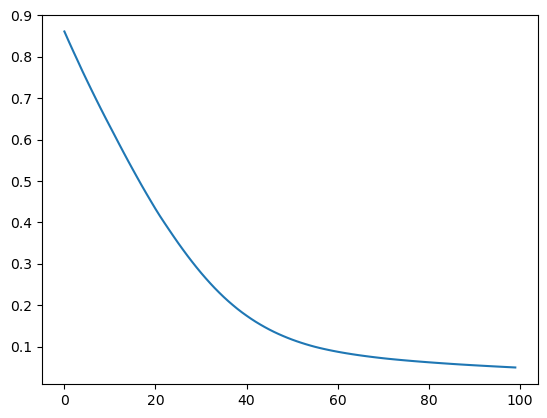

In [13]:
import matplotlib.pyplot as plt
plt.plot(loss_list)

In [14]:
model.eval()

X_range = torch.arange(150, 800, 0.1).view(-1, 1)
X_range_norm = (X_range - x_mean) / x_std

# predict
with torch.no_grad():
    y_mlp_norm = model(X_range_norm)

# MLP returns normalized predictions
# undo normalization of preditions for plotting
y_mlp = y_mlp_norm * y_std + y_mean

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

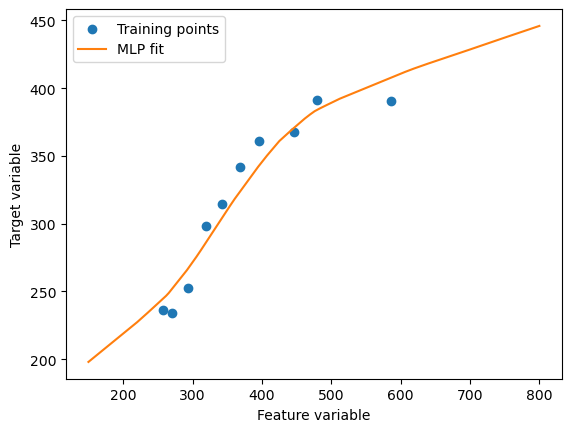

In [ ]:
# plot results
plt.scatter(X_train, y_train, label="Training points")
plt.plot(X_range, y_mlp, color="C1", label="MLP fit", linestyle="-")


plt.xlabel("Feature variable")
plt.ylabel("Target variable")
plt.legend()
# plt.savefig("mlp.pdf")
plt.show()

In [ ]:
import torch
print(torch.cuda.is_available())

True


In [ ]:
my_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)
my_tensor = my_tensor.to("cuda")
my_tensor

tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')